# Kaggle House Prices

This is typically a supervised learning task, a <b>multivariate regression</b> problem.

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Get data

In [2]:
train_df = pd.read_csv("../train.csv",index_col = "Id")
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv("../test.csv",index_col = "Id")
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# what are the categorical features?

train_obj = train_df.select_dtypes(include=['object']).columns.tolist()
res = map(lambda x: train_df[x].value_counts(), train_obj)
list(res);

In [5]:
# what are the numerical features?

train_num = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
res2 = map(lambda x: train_df[x].value_counts(), train_num)
list(res2);

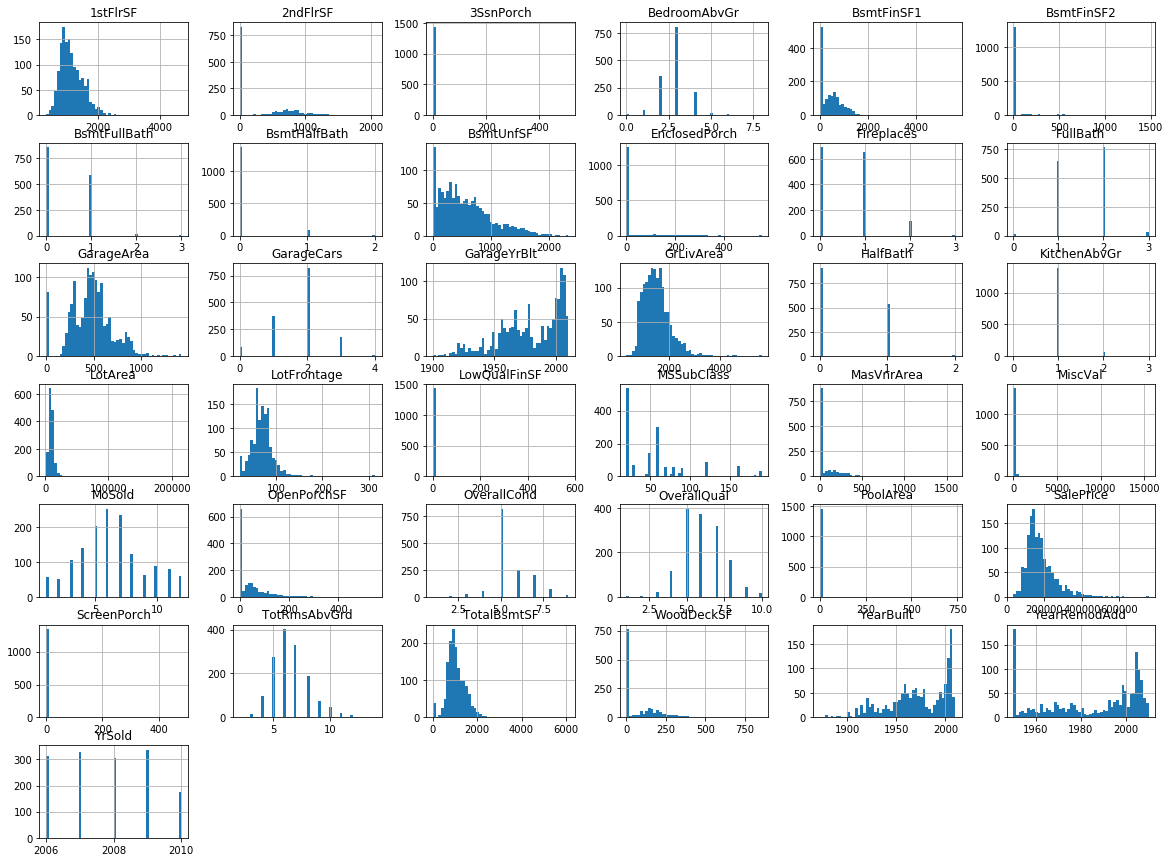

In [6]:
train_df.hist(bins=50, figsize=(20,15)) 
plt.show()

## Target Variable

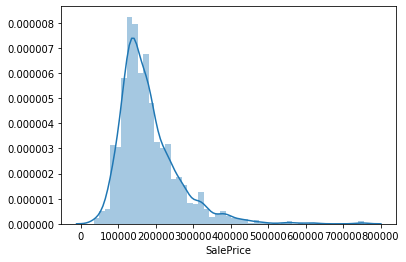

In [7]:
# our target variable is SalePrice
sns.distplot(train_df['SalePrice']);

The target variable is <b>skewed right</b>. We should use a power transformation to make it evenly distributed. Powers < 1 are good for transforming data that is skewed right.

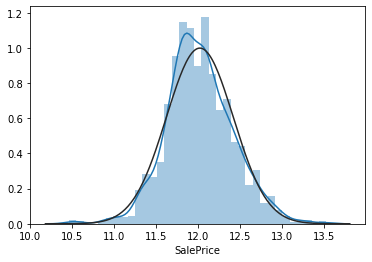

In [8]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

from scipy.stats import norm
sns.distplot(train_df['SalePrice'] , fit=norm);

## Feature engineering

Some features such as MSSubClass and OverallCond appear as numbers but they represent categorical values.

In [9]:
# Change features where the number should be categorical
train_df['MSSubClass'] = train_df['MSSubClass'].astype(str)
train_df['OverallCond'] = train_df['OverallCond'].astype(str)

train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)

Adding a feature "Total Square Feet" of the house

In [10]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df["TotalSF"];

Adding a feature to check if the house was remodeled

In [11]:
train_df["Remod"] = (train_df["YearRemodAdd"] != train_df["YearBuilt"])

Removing outliers

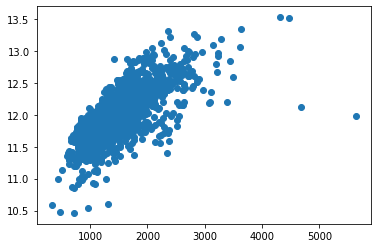

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.show()

In [13]:
train_df.drop(train_df[train_df["GrLivArea"] > 4000].index, inplace=True)

Count of how many rows there are for each feature
(Props to Ryan for the code below)

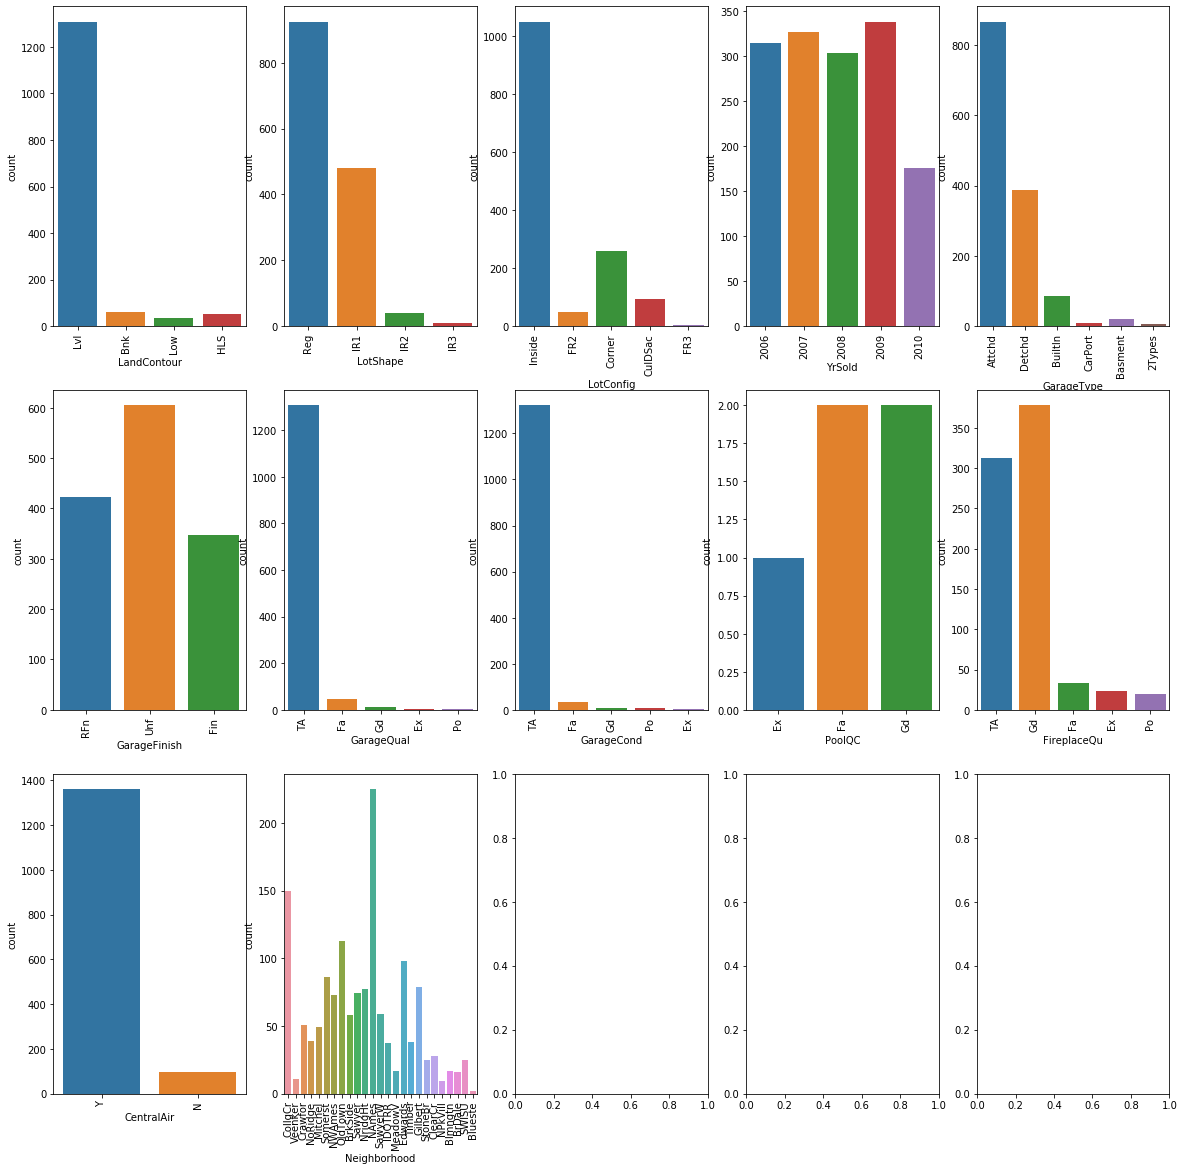

In [14]:
# Important features included in 10 most critical factors listed above
imp_cols = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","WoodDeckSF",
            "OpenPorchSF","GrLivArea","EnclosedPorch","3SsnPorch","ScreenPorch","MasVnrArea","LandContour","LotFrontage",
            "LotArea","LotShape","LotConfig","YearBuilt","YrSold","BedroomAbvGr","BsmtFullBath","BsmtHalfBath",
            "FullBath","HalfBath","TotRmsAbvGrd","GarageType","GarageFinish","GarageYrBlt","GarageCars","GarageArea",
            "GarageQual","GarageCond","PoolArea","PoolQC","Fireplaces","FireplaceQu","CentralAir","YearRemodAdd",
            "Neighborhood"]

# Categorical features among the critical Factors 
cat_imp_cols = train_df[imp_cols].select_dtypes(["object","category"]).columns.tolist()

# Countplots of the categorical features from the list of critical factors
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for col, subplot in zip(cat_imp_cols, ax.flatten()):
    sns.countplot(train_df[col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Some observations for the graphs above:
- [LandContour]: All are irrelevant besides Lv1, separate into 2 bins
- [LotShape]: IR2 and IR3 are irrelevant, separate into 2 bins
- [GarageQual]: All are irrelevant besides TA
- [GarageCond]: All are irrelevant besides TA

## Missingness

Many of the features have NA values but it really means that the feature is not existing. We can fill those with a parameter "No [feature]"

In [15]:
train_df["Alley"].value_counts(dropna = False)

NaN     1365
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [16]:
train_df["MasVnrType"].value_counts(dropna = False)

None       863
BrkFace    444
Stone      126
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [17]:
train_df["BsmtQual"].value_counts(dropna = False)

TA     649
Gd     618
Ex     117
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [18]:
train_df["BsmtCond"].value_counts(dropna = False)

TA     1307
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [19]:
train_df["BsmtExposure"].value_counts(dropna = False)

No     953
Av     220
Gd     131
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [20]:
train_df["BsmtFinType1"].value_counts(dropna = False)

Unf    430
GLQ    414
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [21]:
train_df["BsmtFinType2"].value_counts(dropna = False)

Unf    1252
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [22]:
train_df["FireplaceQu"].value_counts(dropna = False)

NaN    690
Gd     378
TA     312
Fa      33
Ex      23
Po      20
Name: FireplaceQu, dtype: int64

We can create bins for "HasGarage" "NoGarage" since there are 81 houses without garages and so the features about the garage does not make sense.

In [23]:
train_df["GarageType"].value_counts(dropna = False)

Attchd     867
Detchd     387
BuiltIn     87
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
train_df["GarageFinish"].value_counts(dropna = False)

Unf    605
RFn    422
Fin    348
NaN     81
Name: GarageFinish, dtype: int64

In [25]:
train_df["GarageQual"].value_counts(dropna = False)

TA     1307
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [26]:
train_df["GarageCond"].value_counts(dropna = False)

TA     1322
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

Same as garage, we create a category for "HasPool".

In [27]:
train_df["PoolQC"].value_counts(dropna = False)

NaN    1451
Fa        2
Gd        2
Ex        1
Name: PoolQC, dtype: int64

In [28]:
train_df["Fence"].value_counts(dropna = False)

NaN      1176
MnPrv     156
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [29]:
train_df["MiscFeature"].value_counts(dropna = False)

NaN     1402
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

## Feature Selection

<b> 1. Remove the numerical/regressor features with low variance

In [30]:
from sklearn.feature_selection import VarianceThreshold

# create the threshold
thresholder = VarianceThreshold(threshold=.5)

# create high variance feature matrix
features_high_variance = thresholder.fit_transform(housing[train_num])

NameError: name 'housing' is not defined

<b>2. Remove the numerical/regressor features with high correlation

In [31]:
corr_matrix = train_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
TotalSF          0.822029
OverallQual      0.819240
GrLivArea        0.718844
GarageCars       0.680408
GarageArea       0.655212
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363286
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
LowQualFinSF    -0.037698
Remod           -0.075116
KitchenAbvGr    -0.147891
EnclosedPorch   -0.148636
Name: SalePrice, dtype: float64

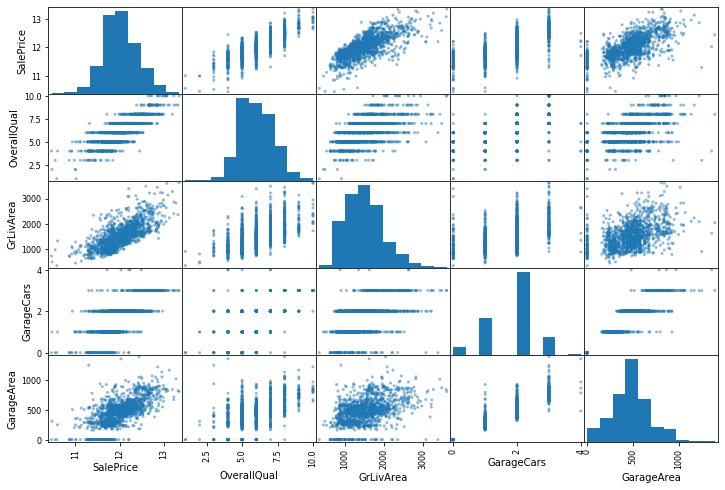

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea"]
scatter_matrix(train_df[attributes], figsize=(12, 8));

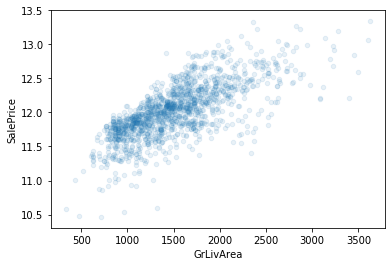

In [33]:
train_df.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.1)

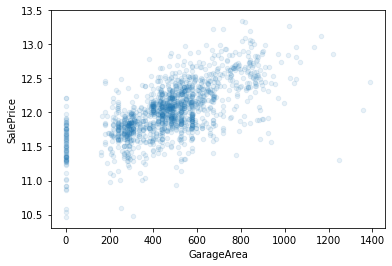

In [34]:
train_df.plot(kind="scatter", x="GarageArea", y="SalePrice", alpha=0.1)

<b> 3. ANOVA F-value

In [35]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2, f_classif

In [36]:
# categorical
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(housing[housing_obj], train_df["SalePrice"])

NameError: name 'housing' is not defined